In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
list_keys = ['Country', 'Total']
list_values = [['United States', 'Soviet Union', 'United Kingdom'], [1118, 473, 273]]

# Zip the 2 lists together into one list of (key,value) tuples: zipped
zipped = list(zip(list_keys,list_values))

# Inspect the list using print()
print(zipped)

# Build a dictionary with the zipped list: data
data = dict(zipped)

# Build and inspect a DataFrame from the dictionary: df
df = pd.DataFrame(data)
print(df)

[('Country', ['United States', 'Soviet Union', 'United Kingdom']), ('Total', [1118, 473, 273])]
          Country  Total
0   United States   1118
1    Soviet Union    473
2  United Kingdom    273


In [3]:
x=5
x

5

In [4]:
x-2,x*2,x**2,x%2,x/2,x/float(2)

(3, 10, 25, 1, 2.5, 2.5)

### Pandas Syntax

In [5]:
df = pd.DataFrame(
        {
            "a":[4,5,6],
            "b":[7,8,9],
            "c":[10,11,12]
        },
        index = [1,2,3])
df2 = pd.DataFrame(
        [[13,14,15],
        [16,17,18],
        [19,20,21]],
        index = [1,2,3],
        columns = ["a","b","c"])
mdf = pd.DataFrame({"a" : [4 ,5, 6],
                    "b" : [7, 8, 9],
                    "c" : [10, 11, 12]},
      index = pd.MultiIndex.from_tuples([('d',1),('d',2),('e',2)],
                                        names=['n','v']))
print(df,"\n",df2,"\n",mdf)

   a  b   c
1  4  7  10
2  5  8  11
3  6  9  12 
     a   b   c
1  13  14  15
2  16  17  18
3  19  20  21 
      a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 2  6  9  12


### Method Chaining

In [6]:
(pd.melt(df)
            .rename(columns={
                   'variable' : 'var',
                   'value' : 'val'})
            .query('val >= 7'))

,var,val
3,b,7
4,b,8
5,b,9
6,c,10
7,c,11
8,c,12


###  Reshaping Data

In [7]:
# Gather columns into rows. 
# “Unpivots” a DataFrame from wide format to long format, optionally leaving identifier variables set.
df_melted = pd.melt(df)
print(df,"\n",df_melted)

   a  b   c
1  4  7  10
2  5  8  11
3  6  9  12 
   variable  value
0        a      4
1        a      5
2        a      6
3        b      7
4        b      8
5        b      9
6        c     10
7        c     11
8        c     12


In [8]:
# Spread rows into columns.
df_melted.pivot(columns='variable', values='value')

variable,a,b,c
0,4.0,NaN,NaN
1,5.0,NaN,NaN
2,6.0,NaN,NaN
3,NaN,7.0,NaN
4,NaN,8.0,NaN
5,NaN,9.0,NaN
6,NaN,NaN,10.0
7,NaN,NaN,11.0
8,NaN,NaN,12.0


In [9]:
# Save the index
print(df
      ,"\n"
      ,(df.reset_index()
                 .melt(id_vars='index')
                 .pivot(index="index",columns='variable', values='value')
       )
      ,end="")
#print(df)

   a  b   c
1  4  7  10
2  5  8  11
3  6  9  12 
 variable  a  b   c
index             
1         4  7  10
2         5  8  11
3         6  9  12

In [10]:
# Append rows of DataFrames
pd.concat([df,df2], axis=0)

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12
1,13,14,15
2,16,17,18
3,19,20,21


In [11]:
# Append columns of DataFrames
pd.concat([df,df2], axis=1)

,a,b,c,a,b,c
1,4,7,10,13,14,15
2,5,8,11,16,17,18
3,6,9,12,19,20,21


In [12]:
df.sort_values("a",ascending=False)

,a,b,c
3,6,9,12
2,5,8,11
1,4,7,10


In [13]:
df.rename(columns = {'a':'abc'})

,abc,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [14]:
df.drop(columns=['a','c'])

,b
1,7
2,8
3,9


### Iris data set

In [49]:
from sklearn import datasets
iris = pd.read_csv('Iris.csv')
df = pd.DataFrame(iris).drop(columns=["Id"])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Subset Observations (Rows)

In [51]:
# Extract rows that meet logical criteria.
df[df.SepalLengthCm > 7].head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
102,7.1,3.0,5.9,2.1,Iris-virginica
105,7.6,3.0,6.6,2.1,Iris-virginica
107,7.3,2.9,6.3,1.8,Iris-virginica
109,7.2,3.6,6.1,2.5,Iris-virginica
117,7.7,3.8,6.7,2.2,Iris-virginica


In [52]:
# Remove duplicate rows (only considers columns).
df.drop_duplicates().head(3).tail(1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
2,4.7,3.2,1.3,0.2,Iris-setosa


In [53]:
# Randomly select fraction of rows.
df.sample(frac=0.05)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
65,6.7,3.1,4.4,1.4,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
106,4.9,2.5,4.5,1.7,Iris-virginica
71,6.1,2.8,4.0,1.3,Iris-versicolor
21,5.1,3.7,1.5,0.4,Iris-setosa
96,5.7,2.9,4.2,1.3,Iris-versicolor
70,5.9,3.2,4.8,1.8,Iris-versicolor
5,5.4,3.9,1.7,0.4,Iris-setosa


In [54]:
# Randomly select n rows.
df.sample(n=3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
146,6.3,2.5,5.0,1.9,Iris-virginica
79,5.7,2.6,3.5,1.0,Iris-versicolor
100,6.3,3.3,6.0,2.5,Iris-virginica


In [55]:
# Select rows by position
df.iloc[18:20]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
18,5.7,3.8,1.7,0.3,Iris-setosa
19,5.1,3.8,1.5,0.3,Iris-setosa


In [56]:
# Select and order top n entries.
df.nlargest(3, 'SepalWidthCm')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
15,5.7,4.4,1.5,0.4,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa


In [57]:
# df.nsmallest(n, 'value')
df.nsmallest(3, 'SepalWidthCm')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
60,5.0,2.0,3.5,1.0,Iris-versicolor
62,6.0,2.2,4.0,1.0,Iris-versicolor
68,6.2,2.2,4.5,1.5,Iris-versicolor


In [58]:
df.sort_values("SepalWidthCm").head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
60,5.0,2.0,3.5,1.0,Iris-versicolor
62,6.0,2.2,4.0,1.0,Iris-versicolor
119,6.0,2.2,5.0,1.5,Iris-virginica
68,6.2,2.2,4.5,1.5,Iris-versicolor
41,4.5,2.3,1.3,0.3,Iris-setosa


In [60]:
df.isnull().drop_duplicates()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False


In [61]:
df.notnull().drop_duplicates()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,True,True,True,True,True


In [63]:
# Return whether any element is True over requested axis.
df.any(axis=None)

True

In [66]:
# Return whether all elements are True, potentially over an axis.
df.all()

SepalLengthCm    True
SepalWidthCm     True
PetalLengthCm    True
PetalWidthCm     True
Species          True
dtype: bool

In [94]:
# Return boolean DataFrame showing whether each element in the DataFrame is contained in values.
df.isin(df.iloc[18:20]).query("SepalLengthCm == True")

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
18,True,True,True,True,True
19,True,True,True,True,True


### Subset Variables

In [96]:
# Select multiple columns with specific names.
df[['SepalLengthCm','SepalWidthCm','Species']].head(2)

,SepalLengthCm,SepalWidthCm,Species
0,5.1,3.5,Iris-setosa
1,4.9,3.0,Iris-setosa


In [97]:
# Select single column with specific name.
df['SepalLengthCm'].head(2)
df.SepalLengthCm.head(2)

0    5.1
1    4.9
Name: SepalLengthCm, dtype: float64

In [99]:
# Select columns whose name matches regular expression regex.
# '\.' -- Matches strings containing a period '.'
# 'Length$' -- Matches strings ending with word 'Length'
# '^Sepal' -- Matches strings beginning with the word 'Sepal'
# '^x[1-5]$' -- Matches strings beginning with 'x' and ending with 1,2,3,4,5
# ''^(?!Species$).*' -- Matches strings except the string 'Species'
df.filter(regex='^(?!Species$).*').head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [101]:
# Select all columns between x2 and x4 (inclusive).
df.loc[:,'SepalWidthCm':'PetalLengthCm'].head(2)

,SepalWidthCm,PetalLengthCm
0,3.5,1.4
1,3.0,1.4


In [103]:
# Select columns in positions 1, 2 and 5 (first column is 0).
df.iloc[:,[1,2,4]].head(2)

,SepalWidthCm,PetalLengthCm,Species
0,3.5,1.4,Iris-setosa
1,3.0,1.4,Iris-setosa


In [115]:
# Select rows meeting logical condition, and only the specific columns .
df.loc[df['SepalWidthCm'] > df['SepalWidthCm'].max()-0.3, ['SepalWidthCm','SepalWidthCm']]

,SepalWidthCm,SepalWidthCm
15,4.4,4.4
33,4.2,4.2


### Summarize Data

In [129]:
# Count number of rows with each unique value of variable
df['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [124]:
# # of rows in DataFrame.
len(df)

150

In [130]:
# # of distinct values in a column.
df['Species'].nunique()

3

In [131]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [135]:
# Handling Missing Data
# Drop rows with any column having NA/null data.
df.dropna().head(2)
# Replace all NA/null data with value.
df.fillna(0).head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [133]:
# sum() Sum values of each object.
# count() Count non-NA/null values of each object.
# median() Median value of each object.
# quantile([0.25,0.75]) Quantiles of each object.
# apply(function) Apply function to each object.
# min() Minimum value in each object.
# max() Maximum value in each object.
# mean() Mean value of each object.
# var() Variance of each object.
# std() Standard deviation of each object.
df.apply("var")

SepalLengthCm    0.685694
SepalWidthCm     0.188004
PetalLengthCm    3.113179
PetalWidthCm     0.582414
dtype: float64

### Make New Columns

In [137]:
# Compute and append one or more new columns.
df.assign(Area=lambda df: df.SepalLengthCm*df.SepalWidthCm).head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Area
0,5.1,3.5,1.4,0.2,Iris-setosa,17.85
1,4.9,3.0,1.4,0.2,Iris-setosa,14.70


In [138]:
# Add single column.
df['Area'] = df.SepalLengthCm*df.SepalWidthCm
df.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Area
0,5.1,3.5,1.4,0.2,Iris-setosa,17.85
1,4.9,3.0,1.4,0.2,Iris-setosa,14.70


In [144]:
# Bin column into n quantile buckets.
pd.qcut(df.SepalLengthCm, 10, labels=False).value_counts()

3    20
8    17
1    16
0    16
5    15
4    15
9    13
6    13
2    13
7    12
Name: SepalLengthCm, dtype: int64

In [150]:
# Return a GroupBy object, grouped by values in column named "col".
df.groupby(by="Species").size(), df.groupby(by="Species").agg("mean")
# shift(1) Copy with values shifted by 1.
# rank(method='dense') Ranks with no gaps.
# rank(method='min') Ranks. Ties get min rank.
# rank(pct=True) Ranks rescaled to interval [0, 1].
# rank(method='first') Ranks. Ties go to first value.
# shift(-1) Copy with values lagged by 1.
# cumsum() Cumulative sum.
# cummax() Cumulative max.
# cummin() Cumulative min.
# cumprod() Cumulative product.

(Species
 Iris-setosa        50
 Iris-versicolor    50
 Iris-virginica     50
 dtype: int64,
                  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
 Species                                                                     
 Iris-setosa              5.006         3.418          1.464         0.244   
 Iris-versicolor          5.936         2.770          4.260         1.326   
 Iris-virginica           6.588         2.974          5.552         2.026   
 
                     Area  
 Species                   
 Iris-setosa      17.2088  
 Iris-versicolor  16.5262  
 Iris-virginica   19.6846  )

### Windows

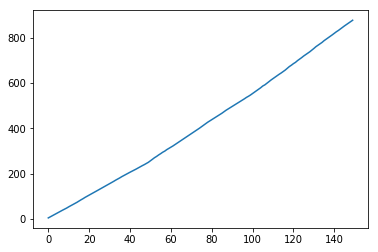

In [166]:
# Return an Expanding object allowing summary functions to be applied cumulatively.
df.expanding()["SepalLengthCm"].sum().plot.line()
plt.show()

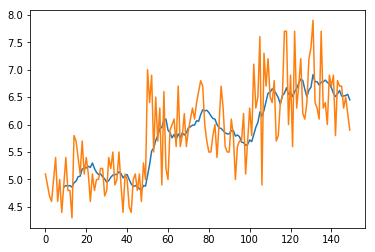

In [170]:
# Return a Rolling object allowing summary functions to be applied to windows of length n.
df.rolling(10)["SepalLengthCm"].mean().plot()
df["SepalLengthCm"].plot()
plt.show()

### Plotting

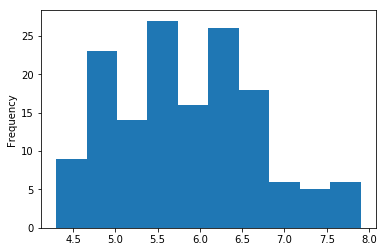

In [174]:
df["SepalLengthCm"].plot.hist()
plt.show()

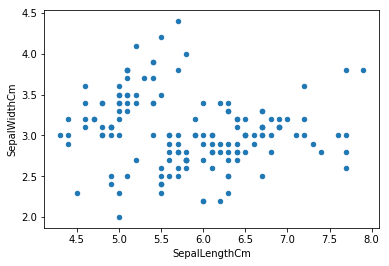

In [177]:
df.plot.scatter(x='SepalLengthCm',y='SepalWidthCm')
plt.show()

### Combine Data Sets

In [181]:
adf = pd.DataFrame(
        {
            "x1":["A","B","C"],
            "x2":[1,2,3]
        },
        index = None)
bdf = pd.DataFrame(
        {
            "x1":["A","B","D"],
            "x3":["T","F","T"]
        },
        index = None)

In [182]:
# Left Join matching rows from bdf to adf.
pd.merge(adf, bdf, how='left', on='x1')

,x1,x2,x3
0,A,1,T
1,B,2,F
2,C,3,NaN


In [183]:
# Right Join matching rows from adf to bdf.
pd.merge(adf, bdf, how='right', on='x1')

,x1,x2,x3
0,A,1.0,T
1,B,2.0,F
2,D,NaN,T


In [184]:
# Inner Join data. Retain only rows in both sets.
pd.merge(adf, bdf, how='inner', on='x1')

,x1,x2,x3
0,A,1,T
1,B,2,F


In [185]:
# Outer Join data. Retain all values, all rows.
pd.merge(adf, bdf, how='outer', on='x1')

,x1,x2,x3
0,A,1.0,T
1,B,2.0,F
2,C,3.0,NaN
3,D,NaN,T


In [186]:
# All rows in adf that have a match in bdf.
adf[adf.x1.isin(bdf.x1)]

,x1,x2
0,A,1
1,B,2


In [187]:
# All rows in adf that do not have a match in bdf.
adf[~adf.x1.isin(bdf.x1)]

,x1,x2
2,C,3


In [190]:
ydf = pd.DataFrame(
        {
            "x1":["A","B","C"],
            "x2":[1,2,3]
        },
        index = None)
zdf = pd.DataFrame(
        {
            "x1":["B","C","D"],
            "x2":[2,3,4]
        },
        index = None)

In [191]:
# Rows that appear in both ydf and zdf (Intersection).
pd.merge(ydf, zdf)

,x1,x2
0,B,2
1,C,3


In [192]:
# pd.merge(ydf, zdf)
pd.merge(ydf, zdf, how='outer')

,x1,x2
0,A,1
1,B,2
2,C,3
3,D,4


In [194]:
# Rows that appear in ydf but not zdf (Setdiff).
(pd.merge(ydf, zdf, how='outer',
                indicator=True)
            .query('_merge == "left_only"')
            .drop(columns=['_merge']))

,x1,x2
0,A,1
